In [203]:
import bql
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime 
bq = bql.Service()

# BQL String:

# get(PX_LAST(dates=range(2010-01-01, 2019-12-31), currency=BRL)) 
# for(members('IBOV Index'))

# BQL Model Object: 

bql_item = bq.data.px_last(dates=bq.func.range('2010-01-01', '2019-12-31'))
bql_universe = bq.univ.members('IBOV Index')
bql_request = bql.Request(bql_universe, bql_item)
bql_response = bq.execute(bql_request)


In [204]:
# Building DataFrame from Response Object:

df_main = bql_response[0].df()
df_main.reset_index(inplace=True)
df_main.columns = ['ID', 'Date', 'Currency', 'Last_Price']
df_main.dropna(inplace=True, axis=0)
df_main.head()

,ID,Date,Currency,Last_Price
3,ENBR3 BS Equity,2010-01-04,BRL,11.089213
4,ENBR3 BS Equity,2010-01-05,BRL,11.174667
5,ENBR3 BS Equity,2010-01-06,BRL,11.339000
6,ENBR3 BS Equity,2010-01-07,BRL,11.421167
7,ENBR3 BS Equity,2010-01-08,BRL,11.569067


In [205]:
# Inspecting ID column:

array_id = df_main.ID.unique()
array_id

array(['ENBR3 BS Equity', 'HGTX3 BS Equity', 'RADL3 BS Equity',
       'BBAS3 BS Equity', 'IGTA3 BS Equity', 'JBSS3 BS Equity',
       'TOTS3 BS Equity', 'EQTL3 BS Equity', 'SBSP3 BS Equity',
       'RENT3 BS Equity', 'ELET3 BS Equity', 'BRFS3 BS Equity',
       'ELET6 BS Equity', 'ITUB4 BS Equity', 'PETR3 BS Equity',
       'PETR4 BS Equity', 'VALE3 BS Equity', 'MULT3 BS Equity',
       'AZUL4 BS Equity', 'TAEE11 BS Equity', 'SANB11 BS Equity',
       'ECOR3 BS Equity', 'MRFG3 BS Equity', 'UGPA3 BS Equity',
       'BBDC3 BS Equity', 'BRML3 BS Equity', 'EGIE3 BS Equity',
       'TIMP3 BS Equity', 'USIM5 BS Equity', 'MRVE3 BS Equity',
       'MGLU3 BS Equity', 'GNDI3 BS Equity', 'CSNA3 BS Equity',
       'VIVT4 BS Equity', 'CRFB3 BS Equity', 'BBSE3 BS Equity',
       'BBDC4 BS Equity', 'BRKM5 BS Equity', 'YDUQ3 BS Equity',
       'CMIG4 BS Equity', 'ABEV3 BS Equity', 'B3SA3 BS Equity',
       'PCAR3 BS Equity', 'GGBR4 BS Equity', 'CYRE3 BS Equity',
       'SUZB3 BS Equity', 'EMBR3 BS Eq

In [206]:
# Building final DataFrame:

df_main = df_main.pivot('Date', 'ID', 'Last_Price')
df_main.tail(10)

ID,ABEV3 BS Equity,AZUL4 BS Equity,B3SA3 BS Equity,BBAS3 BS Equity,BBDC3 BS Equity,BBDC4 BS Equity,BBSE3 BS Equity,BEEF3 BS Equity,BPAC11 BS Equity,BRAP4 BS Equity,...,TAEE11 BS Equity,TIMP3 BS Equity,TOTS3 BS Equity,UGPA3 BS Equity,USIM5 BS Equity,VALE3 BS Equity,VIVT4 BS Equity,VVAR3 BS Equity,WEGE3 BS Equity,YDUQ3 BS Equity
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-13,19.01,56.86,46.40,48.53,29.563636,31.636364,37.35,13.73,74.70,37.82,...,30.36,14.68,22.900000,22.26,9.25,53.76,56.33,10.87,34.05,47.20
2019-12-16,19.08,57.27,46.22,47.87,29.118182,31.081818,36.82,13.47,74.18,37.75,...,30.42,14.52,22.666667,22.43,9.12,53.34,56.63,11.25,33.49,47.35
2019-12-17,18.91,56.87,47.79,48.95,29.581818,31.654545,37.55,12.68,74.84,37.63,...,30.27,14.61,22.633333,23.00,9.25,53.35,56.87,10.99,33.96,46.35
2019-12-18,19.09,57.61,48.56,50.64,30.727273,32.536364,38.03,12.93,75.27,37.40,...,30.40,14.79,22.566667,23.69,9.25,53.47,57.06,11.26,33.90,48.14
2019-12-19,19.17,57.71,48.56,51.16,31.181818,33.136364,38.30,12.37,76.32,37.50,...,30.50,14.70,22.666667,24.29,9.32,54.00,57.24,11.24,33.60,49.70
2019-12-20,18.91,57.00,49.10,51.06,30.290909,32.445455,37.74,12.08,75.58,37.89,...,30.45,15.28,22.820000,24.61,9.33,54.79,57.86,11.37,33.89,48.12
2019-12-23,18.96,57.60,46.87,52.60,30.900000,32.645455,37.95,12.07,74.80,38.43,...,30.65,15.39,22.556667,25.33,9.53,54.58,58.38,11.67,33.79,49.00
2019-12-26,19.22,57.07,46.65,53.20,31.227273,33.054545,37.76,12.64,75.18,39.05,...,31.00,15.59,22.330000,25.60,9.53,54.79,58.89,11.80,34.85,48.60
2019-12-27,19.16,57.80,44.21,52.97,31.027273,32.927273,37.84,12.74,75.80,39.17,...,30.92,15.59,21.606667,25.72,9.43,53.60,58.48,11.50,35.34,48.80


In [207]:
#--------------------------------------------------------------------------------#

In [208]:
# Bid-Ask Spread

# BQL String: 

# get(PX_ASK(dates=range(2018-01-01, 2019-12-31), currency=BRL) ,PX_LAST(dates=range(2018-01-01, 2019-12-31))) 
# for('BPAC11 BZ Equity')

# BQL Object Model: 

bql_item1 = bq.data.px_ask(dates=bq.func.range('2018-01-01', '2019-12-31'))
bql_item2 = bq.data.px_bid(dates=bq.func.range('2018-01-01', '2019-12-31'))
bql_items = [bql_item1, bql_item2]

bql_universe = 'BPAC11 BZ Equity'

bql_request = bql.Request(bql_universe, bql_items)
bql_response = bq.execute(bql_request)
print(bql_response)

In [209]:
# Building DataFrames: 

df_ask = bql_response[0].df()
df_ask.dropna(axis=0, inplace=True)
df_ask.columns = ['Date', 'Currency', 'PX_ASK']
df_ask = df_ask.reset_index()

df_bid = bql_response[1].df()
df_bid.dropna(axis=0, inplace=True)
df_bid.columns = ['Date', 'Currency', 'PX_BID']
df_bid = df_bid.reset_index()

In [210]:
df_ask.head()

,ID,Date,Currency,PX_ASK
0,BPAC11 BZ Equity,2018-01-02,BRL,18.93
1,BPAC11 BZ Equity,2018-01-03,BRL,19.19
2,BPAC11 BZ Equity,2018-01-04,BRL,19.21
3,BPAC11 BZ Equity,2018-01-05,BRL,18.77
4,BPAC11 BZ Equity,2018-01-08,BRL,19.05


In [211]:
df_bid.head()

,ID,Date,Currency,PX_BID
0,BPAC11 BZ Equity,2018-01-02,BRL,18.90
1,BPAC11 BZ Equity,2018-01-03,BRL,19.08
2,BPAC11 BZ Equity,2018-01-04,BRL,19.15
3,BPAC11 BZ Equity,2018-01-05,BRL,18.56
4,BPAC11 BZ Equity,2018-01-08,BRL,18.91


In [212]:
# Merging DataFrames:

df_bid_ask = pd.merge(df_bid, df_ask, on='Date')

In [213]:
df_bid_ask.head()

,ID_x,Date,Currency_x,PX_BID,ID_y,Currency_y,PX_ASK
0,BPAC11 BZ Equity,2018-01-02,BRL,18.90,BPAC11 BZ Equity,BRL,18.93
1,BPAC11 BZ Equity,2018-01-03,BRL,19.08,BPAC11 BZ Equity,BRL,19.19
2,BPAC11 BZ Equity,2018-01-04,BRL,19.15,BPAC11 BZ Equity,BRL,19.21
3,BPAC11 BZ Equity,2018-01-05,BRL,18.56,BPAC11 BZ Equity,BRL,18.77
4,BPAC11 BZ Equity,2018-01-08,BRL,18.91,BPAC11 BZ Equity,BRL,19.05


In [214]:
df_bid_ask.drop(['ID_x','ID_y', 'Currency_x', 'Currency_y'], axis=1, inplace=True)
df_bid_ask.set_index('Date', inplace=True)

In [215]:
df_bid_ask.head()

,PX_BID,PX_ASK
Date,,
2018-01-02,18.90,18.93
2018-01-03,19.08,19.19
2018-01-04,19.15,19.21
2018-01-05,18.56,18.77
2018-01-08,18.91,19.05


In [216]:
# Plotting with Bqviz:

df_bid_ask_sqrd = df_bid_ask
df_bid_ask_sqrd['Plot'] = (df_bid_ask_sqrd['PX_ASK'] - df_bid_ask_sqrd['PX_BID'])**2
df_bid_ask_sqrd.drop(['PX_ASK', 'PX_BID'], axis=1, inplace=True)
import bqviz as bqv

line_plot = bqv.LinePlot(df_bid_ask_sqrd).set_style()
line_plot.show()

GridBox(children=(Figure(animation_duration=500, axes=[Axis(color='white', grid_color='#3c3c3c', grid_lines='d…

[]

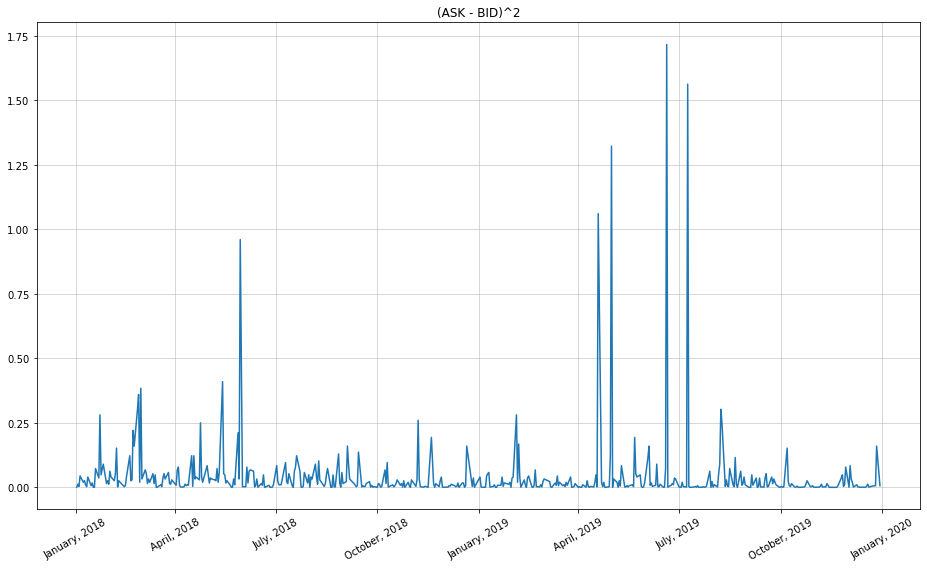

In [217]:
# Potting data using Matplotlib:

plt.figure(figsize=(13, 8))
format = mpl_dates.DateFormatter('%B, %Y')
plt.gca().xaxis.set_major_formatter(format)
plt.plot(df_bid_ask_sqrd.Plot)

plt.title('(ASK - BID)^2')
plt.tick_params(axis='x', rotation=30)
plt.grid(linewidth=0.5)

plt.tight_layout()
plt.plot()

In [218]:
#-----------------------------------------------------------------------------------------------------------------#

In [219]:
# Universe handlers:
# (1) members()
# (2) bonds()
# (3) options()
# (4) equitiesUniv()
# (5) bondsUniv()
# ... check docs for more funcions ...

#---------------------------------------------------------------------------------------------#

# (1) members()
# (1) BQL String:
# get (PX_OPEN(dates=range(-100D, 0D)))
# for (members('IBOX Index'))

# (1) BQL Object Model:

#import bql
#bq = bql.Service()

#bql_item = bq.data.px_open(dates=bq.func.range('-100D', '0D'))
#bql_universe = bq.univ.members('IBOV Index')

#bql_request = bql.Request(bql_universe, bql_item)
#bql_response = bq.execute(bql_request)

#---------------------------------------------------------------------------------------------#

# (2) bonds()
# (2) BQL String:
# get(id()) 
# for(bonds('ITUB4 BZ Equity'))

# BQL Object Model:

#import bql
#bq = bql.Service()

#bql_item = bq.data.id()
#bql_universe = bq.univ.bonds('ITUB4 BZ Equity')

#bql_request = bql.Request(bql_universe, bql_item)
#bql_response = bq.execute(bql_request)

#---------------------------------------------------------------------------------------------#

# (3) options ()
# Greeks 
# Pulls in the options chain for a security
# get(delta(), vega(), theta(), gamma()) 
# for(options('VALE3 BZ Equity'))

##import bql
#bq = bql.Service()

bql_item1 = bq.data.delta()
bql_item2 = bq.data.vega()
bql_item3 = bq.data.theta()
bql_item4 = bq.data.gamma()
bql_items = [bql_item1, bql_item2, bql_item3, bql_item4]

bql_universe = bq.univ.options('VALE3 BZ Equity')
bql_request = bql.Request(bql_universe, bql_items)
bql_response = bq.execute(bql_request)


In [222]:
# Using Pandas to filter out our data ... 

df_delta = bql_response[0].df()
df_delta.dropna(axis=0, inplace=True)

df_vega = bql_response[1].df()
df_theta = bql_response[2].df()
df_gamma = bql_response[3].df()

mask = \
    (df_delta['PUT_CALL'] == 'Call') &\
    (df_delta['EXERCISE_TYPE'] == 'European') &\
    (df_delta['STRIKE_PX'] < 60) &\
    (df_delta['STRIKE_PX'] > 55) &\
    (df_delta['DELTA()'] > 0.5) 

df_delta_f1 = df_delta[mask]
df_delta_f1 = df_delta_f1.sort_values(by='STRIKE_PX', ascending=False)
df_delta_f1

,DATE,EXERCISE_TYPE,EXPIRE_DT,PUT_CALL,STRIKE_PX,DELTA()
ID,,,,,,
BBG00W8ZHW77,2020-08-06,European,2021-01-18,Call,59.5,0.585941
BBG00V0XG9M7,2020-08-06,European,2020-08-17,Call,59.3,0.720317
BBG00VJFY866,2020-08-06,European,2020-10-19,Call,59.3,0.626108
BBG00N7WZTW4,2020-08-06,European,2020-12-21,Call,59.3,0.641150
BBG00VCXQRH9,2020-08-06,European,2020-09-21,Call,59.3,0.642821
BBG00V0XG9K9,2020-08-06,European,2020-08-17,Call,58.3,0.789810
BBG00Q8J0537,2020-08-06,European,2020-09-21,Call,58.3,0.688740
BBG00Q79Q113,2020-08-06,European,2020-08-17,Call,57.3,0.843803
BBG00VCXQRF1,2020-08-06,European,2020-09-21,Call,57.3,0.757591


In [ ]:
#--------------------------------------------------------------------------------------------#